# Lab 08 Iterating A Sequence

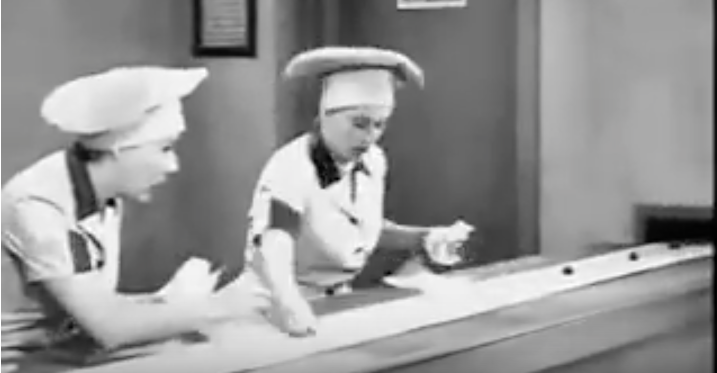

From *I Love Lucy* - early funny television in the USA.

From:  https://www.youtube.com/watch?v=HnbNcQlzV-4   

## Python Sequences
### Iterating a `list`:

In [1]:
planets = ["mercury", "mars", "venus"]

In [2]:
for planet in planets:
    print(planet, end=' ')

mercury mars venus 

### Iterating a `tuple`:

In [3]:
for planet in "mercury", "mars", "venus":
    print(planet, end=' ')

mercury mars venus 

In [4]:
for planet in planets:
    print("Oh {}!".format(planet.title()), end=' ')

Oh Mercury! Oh Mars! Oh Venus! 

### Iterating a `str`:

In [5]:
for char in planets[0]:
    print(char.upper(), end=' ')

M E R C U R Y 

In [6]:
for planet in planets:
    for char in planet:
        print(char.upper(), end=' ')
    print()

M E R C U R Y 
M A R S 
V E N U S 


## for ... in .../else Looping
Use a for ... in .../else loop when you know exactly how many times the loop will go around, maybe one time for each element in an iterable.

In [7]:
names = ["Leonardo", "Herman", "Georgia", "Samson"]
looking_for = "Georgia"
for this_name in names:
    if this_name == looking_for:
        print("Found {}.".format(this_name))
        break
else:
    print("I couldn't find {}.".format(looking_for))
        

Found Georgia.


In [8]:
for this_name in names:
    if this_name != looking_for:
        continue
    print("Found {}.".format(this_name))
    break
else:
    print("I couldn't find {}.".format(looking_for))
        

Found Georgia.


In [9]:
for text in ["howdy", "µs is a microsecond", "τoρνoς"]:
    for char in text:
        if ord(char) >= 128:
            print("Better use bytes for {}.".format(text))
            break
    else:
        print("{} fits in ascii.".format(text))



howdy fits in ascii.
Better use bytes for µs is a microsecond.
Better use bytes for τoρνoς.


    Here is a nice discussion of `str` and `bytes`:
    
https://stackoverflow.com/questions/6224052/what-is-the-difference-between-a-string-and-a-byte-string

## ```range```  Type

In [10]:
type(range)

type

In [11]:
?range

```
Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
```

In [12]:
for count in range(10):
    print(count, end=' ')

0 1 2 3 4 5 6 7 8 9 

In [13]:
for number in range(5,10):
    print(number, end=' ')

5 6 7 8 9 

In [14]:
for even in range(0, 10, 2):
    print(even, end=' ')

0 2 4 6 8 

In [15]:
for countdown in range(10,0,-1):
    print(countdown, end=' ')

10 9 8 7 6 5 4 3 2 1 

These three calls to range are the same:

 *  ```range(10)```
 
 *  ```range(0, 10)```
 
 *  ```range(0, 10, 1)```

### Seeing the results of a call to `range`:

In [16]:
range(3,31,3)

range(3, 31, 3)

In [17]:
print(range(3,31,3))

range(3, 31, 3)


In [18]:
type(range), type(int)

(type, type)

If you want to see the results of your call to ```range``` outside of a ```for/in``` loop, use ```list``` to create a list of the results.

In [19]:
list(range(3,31,3))

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]

In [20]:
primes_to = 100
prime_strs = []
for candidate in range(3, primes_to, 2):
    div = 2
    while div * div <= candidate:
        div += 1
        if candidate % div == 0:   # not prime
            break
    else:                          # div * div <= candidate is False
        prime_strs.append(str(candidate))
print("{} has the primes {}.".format(primes_to, ', '.join(prime_strs)))



100 has the primes 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97.


##  Timing Code 

> µs is a microsecond and is 1/1000000 of a second.

> ns is a nanosecond and is 1/1000000000 of a second.

In [21]:
%%timeit
text = "Is this fast?"
for char in text:
    char

449 ns ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [22]:
%%timeit
text = "Is this fast?"
for i in range(len(text)):
    text[i]    

1.22 µs ± 57.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [23]:
%%timeit
text = "Is this fast?"
i = 0
while i < len(text):
    text[i]
    i += 1
    

2.28 µs ± 29.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%timeit import os

477 ns ± 6.71 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Here we accumulate values into a `list`:

In [25]:
number_strs = []                         # The *empty* list
for number in range(5):
    number_strs.append(str(number))      # or:  number_strs += [str(number)]
print(number_strs)

['0', '1', '2', '3', '4']


#### Accumulate into a `tuple`:

In [26]:
import math
numbers = ()
for number in range(7, 3, -1):
    numbers += math.sqrt(number),
print(numbers, type(numbers))

for number in numbers:
    print(number ** 2, end=' ')

(2.6457513110645907, 2.449489742783178, 2.23606797749979, 2.0) <class 'tuple'>
7.000000000000001 5.999999999999999 5.000000000000001 4.0 

#### Accumulate into a `str`:

In [27]:
text = ""
for obj in ["76", "trombones", "in", "the", "parade"]:
    text += obj + ' '
print(text)
    

76 trombones in the parade 


#### But don't forget:

In [28]:
print(" ".join(["76", "trombones", "in", "the", "parade"]))

76 trombones in the parade


## Exercises

In [ ]:
# 1.  What happens if "Waldo" is added to the list of names?  Think about the answer before you try it.

for name in ["Gerardo", "Isabel", "Santiago", "Luis"]:
    if name != "Waldo":
        continue
    print("I found Waldo!")
    break
else:
    print("Waldo was not found.")

`2.` Get this output:

10, 9, 8, 7, 6, 5, 4, 3, 2, 1, Blastoff!

`3.` You have:

band = ["Javier", "Chave", "Jose", "Martha"]

Use this list to create this output using a for/in loop.

`Hurray Chave!  Hurray Javier!  Hurray Jose!  Hurray Martha!  `

    Can you get the output by using `str.join`?

`4`. From this string: 
```python
"Silver Gold Copper Platinum"
```
Use str.split, a loop, string manipulation and str.join to create the following sentence.  Notice that the metals are in alphabetical order.
```python   
"Copper and gold and platinum and silver are only worth money."
```